## Predict Credit Limit

In [71]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sn

# Pre-processing packages
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

# regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report


# CV, Gridsearch, train_test_split, model selection packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV

In [72]:
data = pd.read_csv('default of credit card clients.csv',  header =1)

In [73]:
data.isnull().values.any()
#print(data.dtypes)
#data = data.head(5000)

False

In [74]:
#pandas_profiling.ProfileReport(data)
print('Education:', data['EDUCATION'].unique())
print('SEX:', data['SEX'].unique())
print('MARRIAGE:', data['MARRIAGE'].unique())
print('PAY_0:', data['PAY_0'].unique())
print('PAY_2:', data['PAY_0'].unique())
print('PAY_3:', data['PAY_0'].unique())
print('PAY_4:', data['PAY_0'].unique())
print('PAY_5:', data['PAY_0'].unique())
print('PAY_6:', data['PAY_0'].unique())
print('default payment next month:', data['default payment next month'].unique())


Education: ['university' 'graduate school' 'high school' 'other']
SEX: ['female' 'male']
MARRIAGE: [1 2 3 0]
PAY_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2: [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_3: [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_4: [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_5: [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_6: [ 2 -1  0 -2  1  3  4  8  7  5  6]
default payment next month: ['default' 'not default']


In [75]:
#pre-process the data
# rename the column to DEFAULT
data = data.rename(columns={"default payment next month": "DEFAULT"})
# Encode labels in column 'DEFAULT'. 
data.loc[(data.DEFAULT == 'not default'), 'DEFAULT'] = 0
data.loc[(data.DEFAULT == 'default'), 'DEFAULT'] = 1

# drop ID column as it does not add any value in analysis
data.drop(['ID'],axis=1, inplace=True)

print(data.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


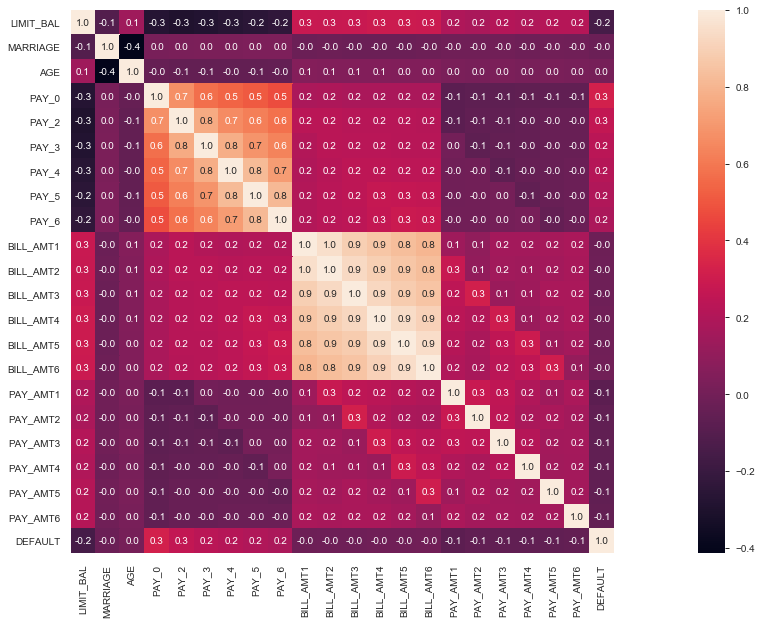

In [76]:
#Correlation matrix to see relation in age and online shopping
corr_mat = data.corr()
#print(corr_mat)
plt.subplots(figsize=(30,10))
sn.heatmap( corr_mat, square=True, annot=True, fmt=".1f" )  

In [77]:
data.groupby(['DEFAULT'])['DEFAULT'].count()

DEFAULT
0    23364
1     6636
Name: DEFAULT, dtype: int64

Text(-0.35, 10000, 'No Default: 23364')

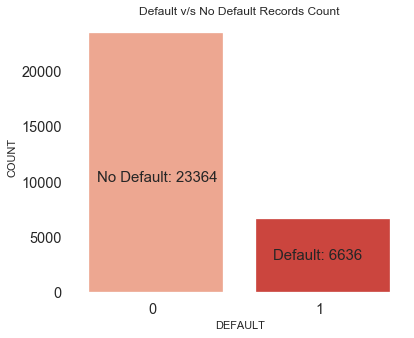

In [78]:
plt.figure(figsize=(6,5))
sn.countplot(x='DEFAULT', data=data, palette='Reds').set_title('Default v/s No Default Records Count')
plt.xticks(horizontalalignment='right', fontsize='x-large'  )
plt.yticks(horizontalalignment='right', fontsize='x-large'  )
plt.ylabel('COUNT')
plt.annotate('Default: {}'.format(len(data[data['DEFAULT'] == 1])), 
             xy=(0.7, 3000), # xy = (x dist from 0, y dist from 0)
            size=15)
plt.annotate('No Default: {}'.format(len(data[data['DEFAULT'] == 0])), 
             xy=(-.35, 10000), # xy = (x dist from 0, y dist from 0)
            size=15)

In [79]:
#Calculate defaults by Gender
data1 = data.groupby(['SEX','DEFAULT'])['DEFAULT'].count()
print(data1)
# calculate percentage of default by Gender
data1.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

SEX     DEFAULT
female  0          14349
        1           3763
male    0           9015
        1           2873
Name: DEFAULT, dtype: int64


SEX     DEFAULT
female  0          79.223719
        1          20.776281
male    0          75.832773
        1          24.167227
Name: DEFAULT, dtype: float64

In [80]:
#Calculate default by Education
data1 = data.groupby(['EDUCATION','DEFAULT'])['DEFAULT'].count()
print(data1)
# calculate percentage of default by Education
data1.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

EDUCATION        DEFAULT
graduate school  0           8549
                 1           2036
high school      0           3680
                 1           1237
other            0            435
                 1             33
university       0          10700
                 1           3330
Name: DEFAULT, dtype: int64


EDUCATION        DEFAULT
graduate school  0          80.765234
                 1          19.234766
high school      0          74.842384
                 1          25.157616
other            0          92.948718
                 1           7.051282
university       0          76.265146
                 1          23.734854
Name: DEFAULT, dtype: float64

In [81]:
#Calculate default percentages by Marriage
data1 = data.groupby(['MARRIAGE','DEFAULT'])['DEFAULT'].count()
print(data1)
data1 = data1.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(data1)
#data1 = data1.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack()
#print(data1)
#data1.plot(kind='bar', stacked=True)


MARRIAGE  DEFAULT
0         0             49
          1              5
1         0          10453
          1           3206
2         0          12623
          1           3341
3         0            239
          1             84
Name: DEFAULT, dtype: int64
MARRIAGE  DEFAULT
0         0          90.740741
          1           9.259259
1         0          76.528296
          1          23.471704
2         0          79.071661
          1          20.928339
3         0          73.993808
          1          26.006192
Name: DEFAULT, dtype: float64


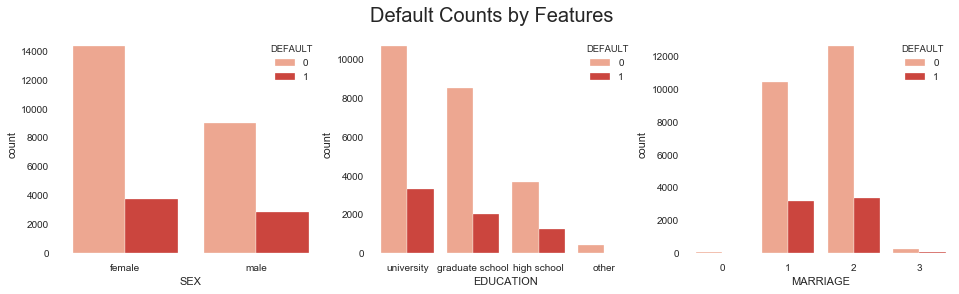

In [82]:
p, axes = plt.subplots(1, 3, figsize=(16,4), facecolor='white')
p.suptitle("Default Counts by Features",size=20)
x1 = sn.countplot(x='SEX', hue = 'DEFAULT', data=data, palette='Reds', ax=axes[0])
x2 = sn.countplot(x='EDUCATION', hue = 'DEFAULT', data=data, palette='Reds', ax=axes[1])
x3 = sn.countplot(x='MARRIAGE', hue = 'DEFAULT', data=data, palette='Reds', ax=axes[2])

          AGE_BINS  DEFAULT      Count
0   (20.999, 26.0]        0  74.936610
1   (20.999, 26.0]        1  25.063390
2     (26.0, 30.0]        0  79.850493
3     (26.0, 30.0]        1  20.149507
4     (30.0, 34.0]        0  80.781550
5     (30.0, 34.0]        1  19.218450
6     (34.0, 39.0]        0  78.643411
7     (34.0, 39.0]        1  21.356589
8     (39.0, 45.0]        0  77.988827
9     (39.0, 45.0]        1  22.011173
10    (45.0, 79.0]        0  74.769758
11    (45.0, 79.0]        1  25.230242


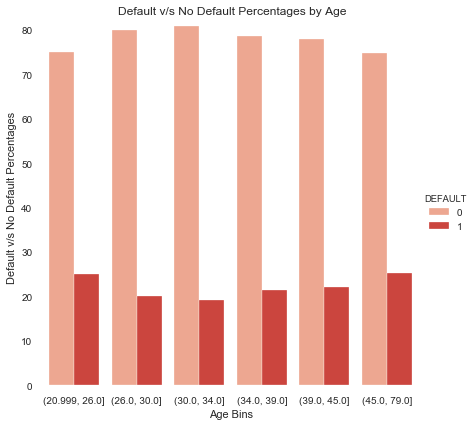

In [83]:
data['AGE_BINS'] = pd.qcut(data['AGE'], q=6)
data1 = data.groupby(['AGE_BINS','DEFAULT'])['DEFAULT'].count()
data1 = data1.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name="Count").reindex(columns=['AGE_BINS', 'DEFAULT', 'Count'])
print(data1)

ax = sn.catplot(x="AGE_BINS", y="Count", hue="DEFAULT", data=data1,
                height=6, kind="bar", palette="Reds")
ax.fig.suptitle('Default v/s No Default Percentages by Age')
ax.set_ylabels('Default v/s No Default Percentages')
ax.set_xlabels('Age Bins')
data.drop(['AGE_BINS'],axis=1, inplace=True)

In [84]:
#create credit limit bins so we can study how limit depend on demographics data
data['LIMIT_BINS'] = pd.cut(x=data['LIMIT_BAL'], bins=[0, 10000, 25000, 50000, 100000, 200000, 300000,400000, 500000,1000000], labels=['10K', '25K', '50K', '100K', '200K', '300K', '400K', '500K', '1000K'])
data1 = data.groupby(['LIMIT_BINS'])['LIMIT_BINS'].count()
print(data1)

LIMIT_BINS
10K       493
25K      1978
50K      5205
100K     4822
200K     7880
300K     5059
400K     2759
500K     1598
1000K     206
Name: LIMIT_BINS, dtype: int64


   LIMIT_BINS  DEFAULT      Count
0         10K        0  60.040568
1         10K        1  39.959432
2         25K        0  64.711830
3         25K        1  35.288170
4         50K        0  70.317003
5         50K        1  29.682997
6        100K        0  74.201576
7        100K        1  25.798424
8        200K        0  80.520305
9        200K        1  19.479695
10       300K        0  83.949397
11       300K        1  16.050603
12       400K        0  85.936934
13       400K        1  14.063066
14       500K        0  87.859825
15       500K        1  12.140175
16      1000K        0  88.834951
17      1000K        1  11.165049


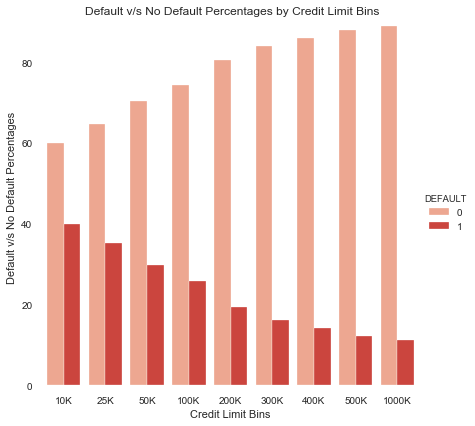

In [85]:
#Calculate default percentages by Marriage
data1 = data.groupby(['LIMIT_BINS','DEFAULT'])['DEFAULT'].count()
#print(data1)
data1 = data1.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name="Count").reindex(columns=['LIMIT_BINS', 'DEFAULT', 'Count'])
print(data1)
#data1.plot(kind='bar')

ax = sn.catplot(x="LIMIT_BINS", y="Count", hue="DEFAULT", data=data1,
                height=6, kind="bar", palette="Reds")
ax.fig.suptitle('Default v/s No Default Percentages by Credit Limit Bins')
ax.set_ylabels('Default v/s No Default Percentages')
ax.set_xlabels('Credit Limit Bins')

Text(0.5, 0, 'Credit Limits')

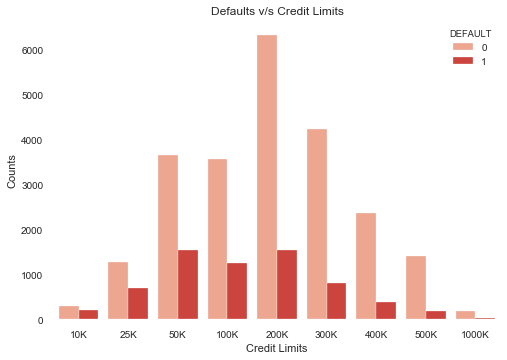

In [86]:
ax = sn.countplot(x='LIMIT_BINS', hue = 'DEFAULT', data=data, palette='Reds')
ax.set_title('Defaults v/s Credit Limits')
ax.set_ylabel('Counts')
ax.set_xlabel('Credit Limits')

Text(0.5, 0, 'Credit Limits')

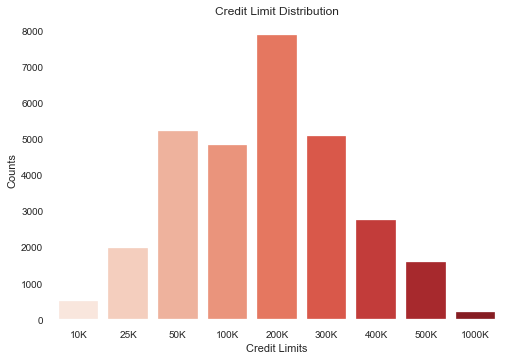

In [87]:
ax = sn.countplot(x='LIMIT_BINS', data=data, palette='Reds')
ax.set_title('Credit Limit Distribution')
ax.set_ylabel('Counts')
ax.set_xlabel('Credit Limits')

Text(0.5, 0, 'Gender')

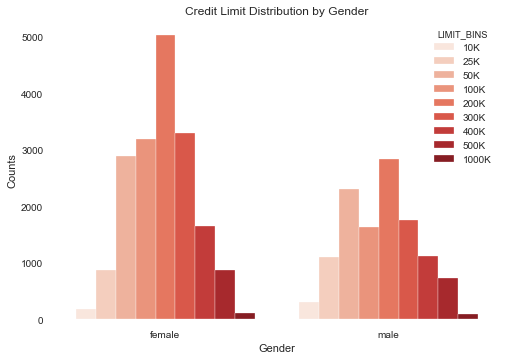

In [88]:
ax = sn.countplot(x='SEX', hue = 'LIMIT_BINS', data=data, palette='Reds')
ax.set_title('Credit Limit Distribution by Gender')
ax.set_ylabel('Counts')
ax.set_xlabel('Gender')

Text(0.5, 0, 'Eduction')

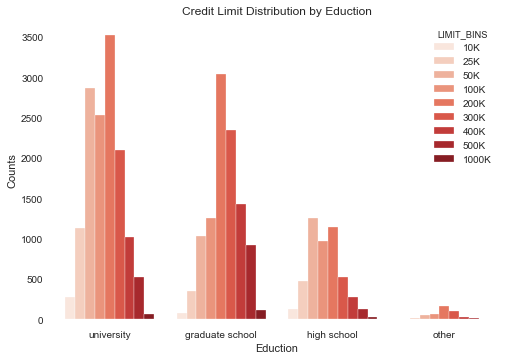

In [89]:
ax = sn.countplot(x='EDUCATION', hue = 'LIMIT_BINS', data=data, palette='Reds')
ax.set_title('Credit Limit Distribution by Eduction')
ax.set_ylabel('Counts')
ax.set_xlabel('Eduction')

Text(0.5, 17.200000000000003, 'Marriage')

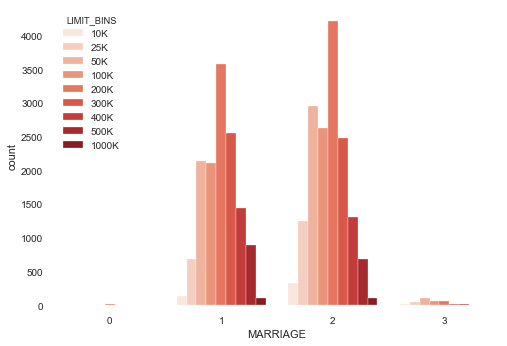

In [90]:
sn.countplot(x='MARRIAGE', hue = 'LIMIT_BINS', data=data, palette='Reds')
ax.set_title('Credit Limit Distribution by Marriage')
ax.set_ylabel('Counts')
ax.set_xlabel('Marriage')

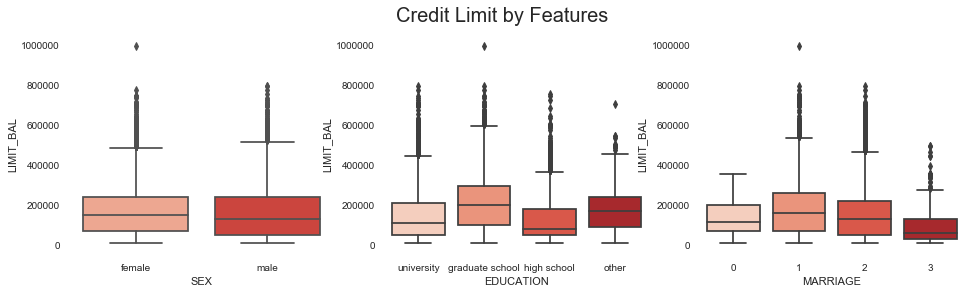

In [91]:
p, axes = plt.subplots(1, 3, figsize=(16,4), facecolor='white')
p.suptitle("Credit Limit by Features",size=20)
# x1 = sn.countplot(x='SEX', hue = 'DEFAULT', data=data, palette='Reds', ax=axes[0])
# x2 = sn.countplot(x='EDUCATION', hue = 'DEFAULT', data=data, palette='Reds', ax=axes[1])
# x3 = sn.countplot(x='MARRIAGE', hue = 'DEFAULT', data=data, palette='Reds', ax=axes[2])

ax1 = sn.boxplot(x="SEX", y="LIMIT_BAL", data=data, palette='Reds', ax=axes[0])
ax2 = sn.boxplot(x="EDUCATION", y="LIMIT_BAL", data=data, palette='Reds', ax=axes[1])
ax3 = sn.boxplot(x="MARRIAGE", y="LIMIT_BAL", data=data, palette='Reds', ax=axes[2])

In [92]:
data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()
df = data.groupby(['PAY_0'])['PAY_0'].count().to_frame(name = 'PAY0').reset_index()
df.columns = ['Indicator', 'PAY0']
for i in range(2,7):
    df['Pay'+str(i)] = data.groupby(['PAY_'+str(i)])['PAY_'+str(i)].count().to_frame(name = 'PAY'+str(i)).reset_index()['PAY'+str(i)]

print(df)

    Indicator   PAY0   Pay2   Pay3   Pay4     Pay5     Pay6
0          -2   2759   3782   4085   4348   4546.0   4895.0
1          -1   5686   6050   5938   5687   5539.0   5740.0
2           0  14737  15730  15764  16455  16947.0  16286.0
3           1   3688     28      4      2   2626.0   2766.0
4           2   2667   3927   3819   3159    178.0    184.0
5           3    322    326    240    180     84.0     49.0
6           4     76     99     76     69     17.0     13.0
7           5     26     25     21     35      4.0     19.0
8           6     11     12     23      5     58.0     46.0
9           7      9     20     27     58      1.0      2.0
10          8     19      1      3      2      NaN      NaN


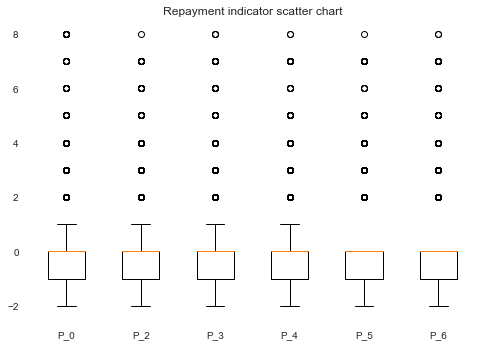

In [93]:
pay_indicators = [data['PAY_0'], data['PAY_2'], data['PAY_3'], data['PAY_4'], data['PAY_5'], data['PAY_6']]
plt.boxplot(pay_indicators, labels = ['P_0', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6'])
plt.title('Repayment indicator scatter chart')
plt.show()

## Prepare data for modeling

In [94]:
#remove all records where marriage status is unknown, this is very small percentage anyways.
#remove all records where Eduction level is other, this is very small percentage anyways.
data = data[(data['MARRIAGE'] != 0) & (data['EDUCATION'] != 'other')]

labelencoder = LabelEncoder()
# Assigning numerical values to non numeric categorial variables
data['EDUCATION'] = labelencoder.fit_transform(data['EDUCATION'])
data['SEX'] = labelencoder.fit_transform(data['SEX'])


# Do one hot encoding for categorical columns and the add them to dataframe
data = pd.concat([data,pd.get_dummies(data['SEX'], prefix='SEX'), 
                       pd.get_dummies(data['EDUCATION'], prefix='EDUCATION'),
                       pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE')
                 ],axis=1)

# now drop the original SEX, EDUCATION, MARRIAGE columns 
data.drop(['SEX','EDUCATION','MARRIAGE'],axis=1, inplace=True)

# change all paid months with value -2 or -1 to zero
data.loc[(data.PAY_0 == -2), 'PAY_0'] = 0
data.loc[(data.PAY_0 == -1), 'PAY_0'] = 0
data.loc[(data.PAY_2 == -2), 'PAY_2'] = 0
data.loc[(data.PAY_2 == -1), 'PAY_2'] = 0
data.loc[(data.PAY_3 == -2), 'PAY_3'] = 0
data.loc[(data.PAY_3 == -1), 'PAY_3'] = 0
data.loc[(data.PAY_4 == -2), 'PAY_4'] = 0
data.loc[(data.PAY_4 == -1), 'PAY_4'] = 0
data.loc[(data.PAY_5 == -2), 'PAY_5'] = 0
data.loc[(data.PAY_5 == -1), 'PAY_5'] = 0
data.loc[(data.PAY_6 == -2), 'PAY_6'] = 0
data.loc[(data.PAY_6 == -1), 'PAY_6'] = 0

#SEX, EDUCATION, SEX, BILL_AMT columns dont have strong correlation with Default, so dropping them
#data.drop(['AGE', 'SEX_0', 'SEX_1', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'MARRIAGE_1', 'MARRIAGE_2', 
#'MARRIAGE_3', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1, inplace=True)

print(data.columns)

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'LIMIT_BINS', 'SEX_0',
       'SEX_1', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')


In [95]:
# scaler = StandardScaler()

# #scale selected columns
# data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = scaler.fit_transform(data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

# data.head()

## Modeling

In [96]:
#predict defaulters
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regressor',LinearRegression()))
algosClass.append(('Support Vector Reg',SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)))

# remove dependent variables to prepare X
X = data.loc[:, data.columns.isin(['LIMIT_BAL']) == False ]
X = X.loc[:, X.columns.isin(['LIMIT_BINS']) == False ]

y = data['LIMIT_BAL']
#print(X)

In [97]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)


In [98]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.46361181734776463
Linear Regressor 0.2885673496152018
Support Vector Reg -0.05604372107098765


In [99]:
#use the columns which we found by feature selection
X = X[['AGE', 'SEX_0', 'SEX_1','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','EDUCATION_0','EDUCATION_1','EDUCATION_2']]

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


In [100]:
#fine tuning the Random Forest Regressor using GridSearchCV
from math import sqrt

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model based on parameters tuned using GridSearchCV
rf = RandomForestRegressor(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)

# Commenting following so I can run it again quicker
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
#grid_search.fit(X_train, y_train)

#print(grid_search.best_params_);
#best_grid = grid_search.best_estimator_

rf.fit(X_train, y_train)

#Make Predictions
y_pred = rf.predict(X_test)

predRsquared = r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)


R Squared: 0.482
RMSE: 93805.664


In [101]:
# plt.scatter(y_test, y_pred, color=['blue','green'], alpha = 0.5)
# plt.xlabel('Ground Truth')
# plt.ylabel('Predictions')
# plt.show();

## Feature Selection

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Feature extraction
test = SelectKBest(score_func=f_classif, k=15)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
X.columns[test.get_support(indices=True)].tolist()


[ 9.871  9.356  9.356 56.42  55.458 54.832 59.44  61.999 62.686 19.909
 18.075 58.834 26.841 30.154 24.164 33.185 10.338 10.687]


['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'EDUCATION_0',
 'EDUCATION_1',
 'EDUCATION_2']

In [103]:
# Feature extraction
from sklearn.feature_selection import RFE

model = RandomForestRegressor()
rfe = RFE(model, 15)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
X.columns[rfe.get_support(indices=True)].tolist()

C:\ProgramData\Anaconda3\envs\datascience1\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 15
Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True False False]
Feature Ranking: [1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3 4]


['AGE',
 'SEX_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'EDUCATION_0']

In [70]:
# Hyper parameter tuning for SVR
parameters = {'kernel':[ 'linear'], 'C':np.logspace(np.log10(0.001), np.log10(200), num=20), 'gamma':np.logspace(np.log10(0.00001), np.log10(2), num=30)}
grid_search = GridSearchCV(SVR(), parameters, n_jobs=8, verbose=1)
model = grid_search.fit(X_train, y_train)
print(grid_search.best_params_);


#Make Predictions
y_pred = model.predict(X_test)

predRsquared = r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)



Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 